In [1]:
# Logan Schraeder - x356t577
# CS 770 - Spring 2025
# Assignment 2
# Due: 28 March 2025

In [2]:
# Library imports

import numpy as np
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Data load
df = pd.read_csv('/content/bmi.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


**Data Cleanup & EDA**

In [5]:
# Start EDA
# Show all datatypes
df.dtypes

,0
Gender,object
Height,int64
Weight,int64
Index,int64


In [6]:
# Show df shape
df.shape

(500, 4)

In [7]:
# Check for missing or null values
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [8]:
# Convert male/female into binary codes
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [9]:
# Descriptive stats of the dataset
df.describe()

,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.490000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,0.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


In [10]:
# Check for gender class imbalance
df['Gender'].value_counts()

,count
Gender,
0,255
1,245


<Axes: >

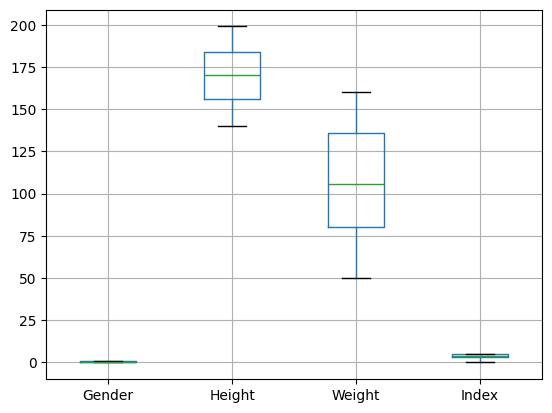

In [11]:
# Visually check for outliers
df.boxplot(column=['Gender', 'Height', 'Weight', 'Index'])


In [12]:
# Explore correlations
df.corr()

,Gender,Height,Weight,Index
Gender,1.000000,-0.017677,0.009523,0.028786
Height,-0.017677,1.000000,0.000446,-0.422223
Weight,0.009523,0.000446,1.000000,0.804569
Index,0.028786,-0.422223,0.804569,1.000000


<Axes: >

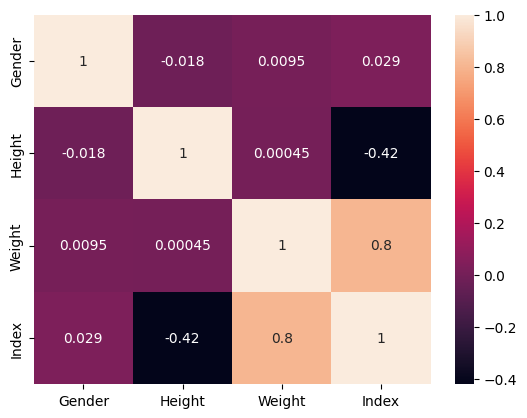

In [13]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True)

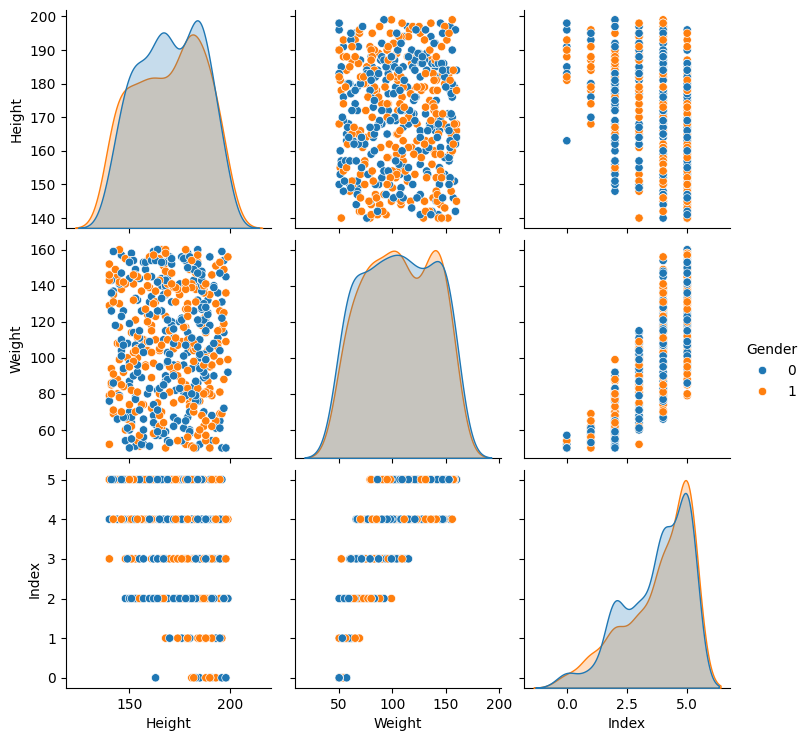

In [14]:
# Explore gender relationships to height, weight, and index
sns.pairplot(df, hue='Gender')

**Data Preprocessing**

In [15]:
# Normalize only height and weight
df_norm = df.copy()
df_norm[['Height', 'Weight']] = preprocessing.normalize(df[['Height', 'Weight']])
df_norm.head()

,Gender,Height,Weight,Index
0,1,0.875578,0.483077,4
1,1,0.908381,0.418144,2
2,0,0.859536,0.511075,4
3,0,0.882353,0.470588,3
4,1,0.925448,0.378875,3


In [16]:
# Create test/train/val split
from sklearn.model_selection import train_test_split
X = df_norm.drop('Index', axis=1)
y = df_norm['Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

In [17]:
# Perform logistic regression training
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Perform SVM training
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [19]:
# Perform KNN training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.82      0.50      0.62        18
           3       0.00      0.00      0.00         8
           4       0.39      0.37      0.38        30
           5       0.67      1.00      0.80        39

    accuracy                           0.59       100
   macro avg       0.31      0.31      0.30       100
weighted avg       0.53      0.59      0.54       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


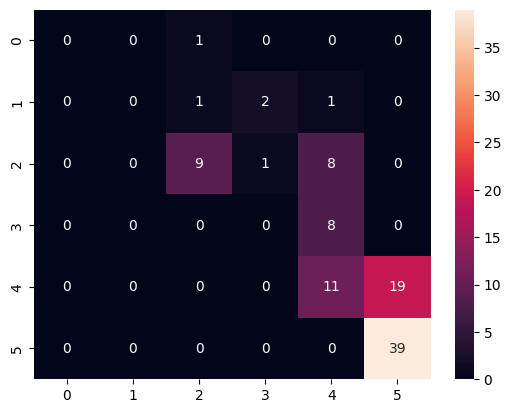

In [20]:
# Predict Index using Logisitic Regression
y_pred_logreg = logreg.predict(X_test)

# Print scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))

# Plot performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True)

# Show model sensitivities
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.71      0.56      0.62        18
           3       0.21      0.50      0.30         8
           4       0.77      0.67      0.71        30
           5       0.88      0.92      0.90        39

    accuracy                           0.70       100
   macro avg       0.43      0.44      0.42       100
weighted avg       0.72      0.70      0.70       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


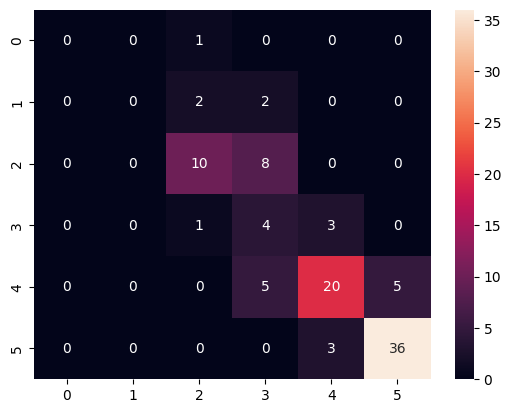

In [21]:
# Predict using SVM
y_pred_svm = svm.predict(X_test)

# Print scores
print('Accuracy:', accuracy_score(y_test, y_pred_svm))

# Plot performance
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True)

# Show model sensitivities
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       0.94      0.83      0.88        18
           3       0.36      0.62      0.45         8
           4       0.74      0.67      0.70        30
           5       0.94      0.87      0.91        39

    accuracy                           0.79       100
   macro avg       0.77      0.83      0.79       100
weighted avg       0.82      0.79      0.80       100



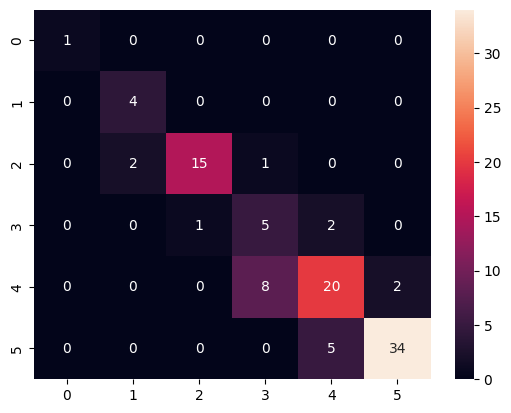

In [22]:
# Predict using KNN
y_pred_knn = knn.predict(X_test)

# Print scores
print('Accuracy:', accuracy_score(y_test, y_pred_knn))

# Plot performance
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True)

# Show model sensitivities
print(classification_report(y_test, y_pred_knn))

In [24]:
    # Male-Only Model Training
df_male = df[df['Gender'] == 1]
X_male = df_male.drop('Index', axis=1)
y_male = df_male['Index']

# Male-Only Logistic Regression Training
logreg_male = LogisticRegression()
logreg_male.fit(X_male, y_male)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [26]:
# Male-Only SVM Training
svm_male = SVC()
svm_male.fit(X_male, y_male)

SVC()

In [27]:
# Male-Only KNN Training
knn_male = KNeighborsClassifier()
knn_male.fit(X_male, y_male)

KNeighborsClassifier()

Logistic Regression Accuracy: 0.39
SVM Accuracy: 0.39
KNN Accuracy: 0.08
Logistic Regression Sensitivities:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        30
           5       0.39      1.00      0.56        39

    accuracy                           0.39       100
   macro avg       0.07      0.17      0.09       100
weighted avg       0.15      0.39      0.22       100

SVM Sensitivities:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        30
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

<Axes: >

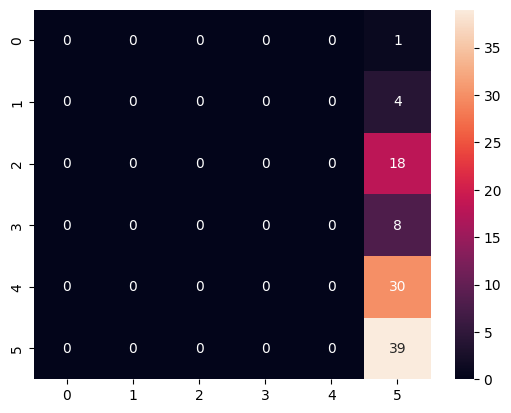

In [31]:
# Male-Only Predictions
y_pred_logreg_male = logreg_male.predict(X_test)
y_pred_svm_male = svm_male.predict(X_test)
y_pred_knn_male = knn_male.predict(X_test)

# Print accuracy
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg_male))
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm_male))
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn_male))

# Show sensitivities
print('Logistic Regression Sensitivities:', classification_report(y_test, y_pred_logreg_male))
print('SVM Sensitivities:', classification_report(y_test, y_pred_svm_male))
print('KNN Sensitivities:', classification_report(y_test, y_pred_knn_male))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg_male)
sns.heatmap(cm, annot=True)

In [29]:
# Female-Only Model Training
df_female = df[df['Gender'] == 0]
X_female = df_female.drop('Index', axis=1)
y_female = df_female['Index']

# LogReg Training
logreg_female = LogisticRegression()
logreg_female.fit(X_female, y_female)

# SVM Training
svm_female = SVC()
svm_female.fit(X_female, y_female)

# KNN Training
knn_female = KNeighborsClassifier()
knn_female.fit(X_female, y_female)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

Logistic Regression Accuracy: 0.58
SVM Accuracy: 0.18
KNN Accuracy: 0.18
Logistic Regression Sensitivities:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.25      0.33         4
           2       0.77      0.94      0.85        18
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        30
           5       0.52      1.00      0.68        39

    accuracy                           0.58       100
   macro avg       0.47      0.53      0.48       100
weighted avg       0.37      0.58      0.44       100

SVM Sensitivities:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.18      1.00      0.31        18
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        30
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

<Axes: >

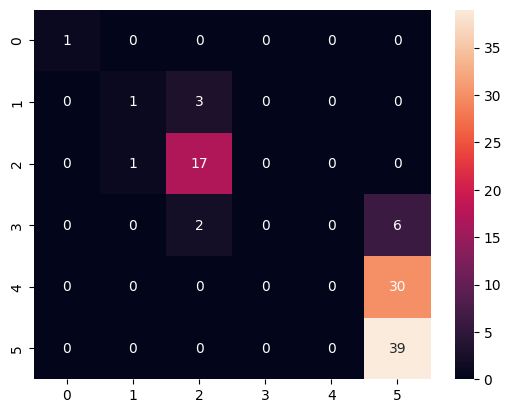

In [32]:
# Predict and print results
y_pred_logreg_female = logreg_female.predict(X_test)
y_pred_svm_female = svm_female.predict(X_test)
y_pred_knn_female = knn_female.predict(X_test)

# Print Accuracies
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg_female))
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm_female))
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn_female))

# Show sensitivities
print('Logistic Regression Sensitivities:', classification_report(y_test, y_pred_logreg_female))
print('SVM Sensitivities:', classification_report(y_test, y_pred_svm_female))
print('KNN Sensitivities:', classification_report(y_test, y_pred_knn_female))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg_female)
sns.heatmap(cm, annot=True)